In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\z003s6px\\Desktop\\ITP Pune\\Data Mining\\individual assignment'

# 1. Read the data and do exploratory data analysis. Describe the data briefly.

In [3]:
bank_df = pd.read_csv('bank_marketing_part1_Data.csv')
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
bank_df.shape

(210, 7)

In [6]:
bank_df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [7]:
#checking for null values
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
#checking for duplicate values
bank_df.duplicated().sum()

0

In [9]:
#checking the description of data
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


The data is quite normalized as we can we for all the coulmns, there is not much difference between mean and median values.
We can visualize the same using distplot.

In [10]:
bank_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

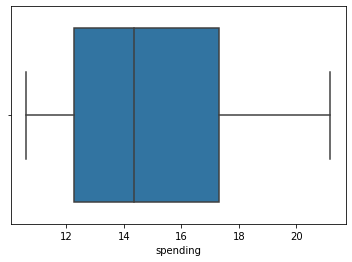

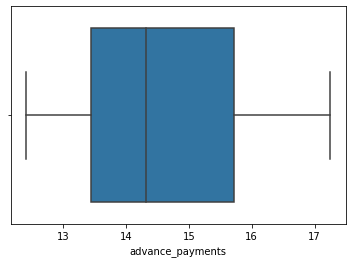

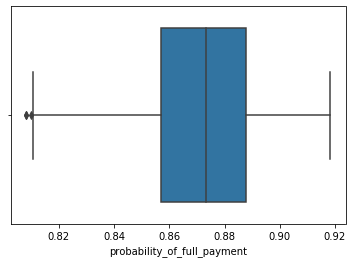

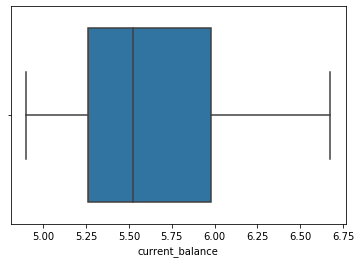

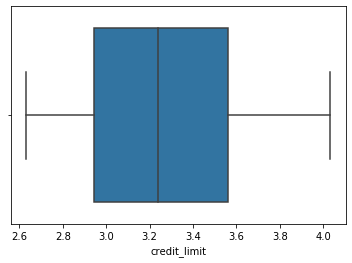

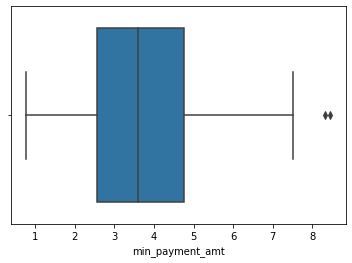

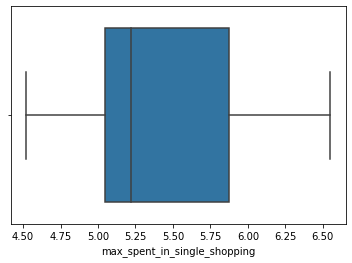

In [11]:
#checking for outliers
for i in bank_df.columns:
    sns.boxplot(bank_df[i])
    plt.show()

We can see that 'probability_of_full_payment' and 'min_payment_amt' have few outliers. 

# 2.Do you think scaling is necessary for clustering in this case? Justify.

Yes, in Clusitering scaling is always recommended since it's a distance based algorithm and both "Heirarchical" and "K-means" clustering follows the same. Moreover, we can see that the data is spread over multiple scales for each column, in this case scaling becomes necessaray

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scale = StandardScaler()
ss = scale.fit(bank_df)
ss

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
ss1 = ss.transform(bank_df)
ss1

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [15]:
pd.DataFrame(ss1,columns=bank_df.columns)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [16]:
bank_scaled = pd.DataFrame(scale.fit_transform(bank_df),columns=bank_df.columns)
bank_scaled

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


# 3.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
wardlink = linkage(bank_scaled,method = 'ward')

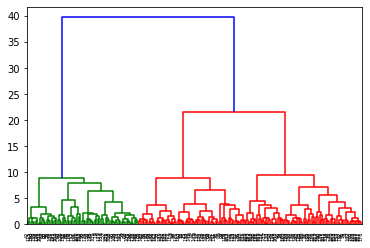

In [19]:
warddend = dendrogram(wardlink)

From the above dendogram we can see that, if we cut a line at the height of 10, we can get 3 distinct cluster, here it seems 3 is the optimal no. of cluster

In [20]:
from scipy.cluster.hierarchy import fcluster

In [21]:
h_clusters = fcluster(wardlink, 3, criterion='maxclust')
h_clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [22]:
bank_df['h_clusters'] = h_clusters

In [23]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,h_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [24]:
bank_df.to_csv('Bank_data_Heirarchical_clustering.csv')

In [25]:
df_clust = bank_df.groupby('h_clusters').mean()
df_clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
h_clusters,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


In [26]:
df_clust = df_clust.reset_index()
df_clust

,h_clusters,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
1,2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
2,3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


In [27]:
cluster_freq = bank_df['h_clusters'].value_counts().sort_index()
cluster_freq

1    70
2    67
3    73
Name: h_clusters, dtype: int64

In [28]:
df_clust['Frequency_hierarchical'] = cluster_freq.values
df_clust

,h_clusters,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Frequency_hierarchical
0,1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
1,2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
2,3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


# 4. Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

Since we do not know the value of 'K' i.e. the opitmum number of clusters we will start with 2 clusters and check the Within Sum of Squares (WSS).

In [29]:
from sklearn.cluster import KMeans 

In [30]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,h_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [31]:
bank_dfk = bank_df.drop(['h_clusters'],axis=1)

In [32]:
bank_dfk.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [33]:
wss =[] 

In [34]:
for i in range(2,9): #we are mentioning the range which the value of 'i' should take
    KM = KMeans(n_clusters=i) #we are defining the number of clusters which is the same as 'i'
    KM.fit(bank_scaled) #we are applying the 'fit' function to form the required number of clusters in the dataset
    wss.append(KM.inertia_) # we are adding all the values of 'inertia' into the empty list called wss
    
#In short, we are calculating the value of 'inertia' in every step and storing the same in 'wss'

In [35]:
for i in range(2,9):
    print('The WSS value for',i,'clusters is',wss[i-2])

The WSS value for 2 clusters is 659.1717544870407
The WSS value for 3 clusters is 430.65897315130053
The WSS value for 4 clusters is 371.301721277542
The WSS value for 5 clusters is 328.0917593606348
The WSS value for 6 clusters is 292.7552562966838
The WSS value for 7 clusters is 263.3699187477947
The WSS value for 8 clusters is 239.7964460967727


We can see that the maximum drop in WSS values in between 2 and 3 clusters.

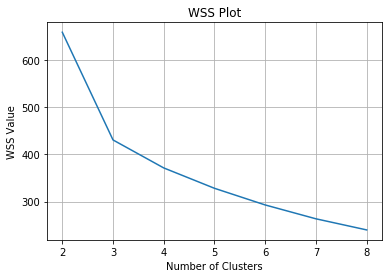

In [36]:
plt.plot(range(2,9), wss)
plt.grid()
plt.title('WSS Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Value')
plt.show()

The number of clusters corresponding to the elbow-like graph is 3 which is considered to be the most optimum.

In [37]:
k_means = KMeans(n_clusters = 3)
k_means.fit(bank_scaled)
labels = k_means.labels_
labels

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [38]:
bank_dfk["Clus_kmeans"] = labels
bank_dfk.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [39]:
bank_dfk.to_csv('bank_KMeans_Output.csv')

In [40]:

df_clustk = bank_dfk.groupby('Clus_kmeans').mean()
df_clustk = df_clustk.reset_index()
df_clustk

,Clus_kmeans,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722
1,1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701
2,2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803


In [41]:
cluster_freq = bank_dfk['Clus_kmeans'].value_counts().sort_index()
cluster_freq

0    72
1    67
2    71
Name: Clus_kmeans, dtype: int64

In [42]:
df_clustk['Frequency_kmeans'] = cluster_freq.values
df_clustk

,Clus_kmeans,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Frequency_kmeans
0,0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
1,1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [44]:
silhouette_score(bank_scaled,labels)

0.4007270552751299

In [45]:
sil_width = silhouette_samples(bank_scaled,labels)

In [46]:
bank_dfk["sil_width"] = sil_width
bank_dfk.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [47]:
silhouette_samples(bank_scaled,labels).min()

0.002713089347678533

Since there is no negative value for the silhoutte sample, that means all the data points are clustered correctly.

# 5. Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.